# Exploratory Data Analysis Pt.4

In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import scipy.stats as stat

# Data Manipulation

In [3]:
# Set working directory
path = '/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Data'
os.chdir(path)

# Read in data
df = pd.read_parquet("dtf_categorical_col.parquet")

# Slice data to only include time from 360 and below because this is the median or more frequent number of gambles among players.
dtf_2 = df[df['gambles'] <= 360]

In [4]:
# Create a list of unique 'timing' values
timing = dtf_2['timing'].unique()

# Count the number of players per leg
count = {}
for i in timing:
    leg = dtf_2[dtf_2['timing'] == i]
    leg = leg['playerkey'].unique()
    leg = len(leg)
    count[i] = leg

print(count)

# Create a list of unique players in leg 1
leg1 = dtf_2[dtf_2['timing'] == 'leg 1']
leg1 = leg1['playerkey'].unique()

# Create a list of unique players in leg 9
leg9 = dtf_2[dtf_2['timing'] == 'leg 9']
leg9 = leg9['playerkey'].unique()

# Identify how many players continue playing and how many stop playing
stop_playing = []
continue_playing = []
for i in leg1:
    if i in leg9:
        continue_playing.append(i)
    else:
        stop_playing.append(i)

# Which players stop playing
print('Players who stop playing', stop_playing)
print('Number of players who stop playing', len(stop_playing))

# Which players continue playing
print('Players who continue playing', continue_playing)
print('Number of players who continue playing', len(continue_playing))

{'leg 1': 83, 'leg 2': 83, 'leg 3': 74, 'leg 4': 69, 'leg 5': 66, 'leg 6': 61, 'leg 7': 56, 'leg 8': 50, 'leg 9': 46}
Players who stop playing [3, 7, 10, 11, 21, 22, 25, 27, 30, 35, 37, 39, 41, 42, 47, 49, 51, 52, 53, 56, 57, 65, 68, 70, 71, 74, 75, 77, 78, 80, 81, 82, 83, 84, 85, 88, 96]
Number of players who stop playing 37
Players who continue playing [2, 4, 6, 8, 9, 12, 13, 14, 16, 17, 18, 19, 20, 23, 29, 33, 36, 38, 40, 43, 44, 46, 48, 54, 61, 62, 63, 66, 69, 72, 73, 76, 79, 86, 87, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100]
Number of players who continue playing 46


In [5]:
# Create a df with only players who stop playing
dtf_stop = dtf_2[dtf_2['playerkey'].isin(stop_playing)]

# Create a df with only players who continue playing
dtf_continue = dtf_2[dtf_2['playerkey'].isin(continue_playing)]

# Create a df with only leg 1 and leg 2
dtf_stop_leg1_2 = dtf_stop[dtf_stop['timing'].isin(['leg 1', 'leg 2'])]

# Create a df with only leg 1 and leg 2
dtf_continue_leg1_2 = dtf_continue[dtf_continue['timing'].isin(['leg 1', 'leg 2'])]

# Data Analysis

## Define Functions

In [6]:
def calc_sum_stats(boot_df):
    sum_stats = boot_df.describe().T[['count', 'mean', 'std', 'min', 'max']]
    sum_stats['variance'] = statistics.variance(boot_df)
    sum_stats['SE'] = stat.sem(boot_df)
    sum_stats['median'] = boot_df.median()
    sum_stats['skew'] = boot_df.skew()
    sum_stats['kurtosis'] = boot_df.kurtosis()
    sum_stats['IQR'] = boot_df.quantile(0.75) - boot_df.quantile(0.25)
    return sum_stats.T

## People who Stop Playing

In [7]:
# Calcualte mean losses of dtf_stop_leg1_2
mean_loss = round(dtf_stop_leg1_2[dtf_stop_leg1_2['result_type'] == 'loss']['percent_return'].mean(), 2)
# Count how many losses of dtf_stop_leg1_2
count_loss = dtf_stop_leg1_2['result_type'].value_counts()['loss']
# Print mean loss and count of losses
print('Mean loss:', mean_loss)
print('Count of losses:', count_loss)
print('--------------------------------------------')

# Calculate mean near-hit of dtf_stop_leg1_2
mean_near_hit = round(dtf_stop_leg1_2[dtf_stop_leg1_2['result_type'] == 'near-hit']['percent_return'].mean(), 2)
# Count how many near-hits of dtf_stop_leg1_2
count_near_hit = dtf_stop_leg1_2['result_type'].value_counts()['near-hit']
# Print mean near-hit and count of near-hits
print('Mean near-hit:', mean_near_hit)
print('Count of near-hits:', count_near_hit)
print('--------------------------------------------')

# Calculate mean gain of dtf_stop_leg1_2
mean_gain = round(dtf_stop_leg1_2[dtf_stop_leg1_2['result_type'] == 'gain']['percent_return'].mean(), 2)
# Count how many gains of dtf_stop_leg1_2
count_gain = dtf_stop_leg1_2['result_type'].value_counts()['gain']
# Print mean gain and count of gains
print('Mean gain:', mean_gain)
print('Count of gains:', count_gain)
print('--------------------------------------------')

Mean loss: -100.0
Count of losses: 1637
--------------------------------------------
Mean near-hit: -61.83
Count of near-hits: 669
--------------------------------------------
Mean gain: 351.95
Count of gains: 406
--------------------------------------------


In [19]:
# Calaculate stats of playercashableamt of dtf_stop_leg1_2
stats_cash = calc_sum_stats(dtf_stop_leg1_2['playercashableamt'])

# Calaculate stats of wageredamt of dtf_stop_leg1_2
stats_wagered = calc_sum_stats(dtf_stop_leg1_2['wageredamt'])

# Calaculate stats of age of dtf_stop_leg1_2
stats_age = calc_sum_stats(dtf_stop_leg1_2['age'])

# Calaculate stats of maxbet of dtf_stop_leg1_2
stats_maxbet = calc_sum_stats(dtf_stop_leg1_2['maxbet'])

# Calaculate stats of player_loss of dtf_stop_leg1_2
stats_player_loss = calc_sum_stats(dtf_stop_leg1_2['player_loss'])

# Calculate statas of player_wins of dtf_stop_leg1_2
stats_player_wins = calc_sum_stats(dtf_stop_leg1_2['player_wins'])

# Calaculate stats of percent_return of dtf_stop_leg1_2
stats_percent_return = calc_sum_stats(dtf_stop_leg1_2['percent_return'])

# Calaculate stats of slotdenomination of dtf_stop_leg1_2
stats_slotdenomination = calc_sum_stats(dtf_stop_leg1_2['slotdenomination'])

# Concant all stats into one df called stats_stop_play_leg1_2 with column names 'cash', 'wagered', 'age', 'maxbet', 'loss', 'wins', 'percent_return', 'slotdenomination'
stats_stop_play_leg1_2 = pd.concat([stats_cash, stats_wagered, stats_age, stats_maxbet, stats_player_loss, stats_player_wins, stats_percent_return, stats_slotdenomination], axis=1)
stats_stop_play_leg1_2.columns = ['cash', 'wagered', 'age', 'maxbet', 'loss', 'wins', 'percent_return', 'slotdenomination']
print(stats_stop_play_leg1_2.to_latex(index=True))


\begin{tabular}{lrrrrrrrr}
\toprule
{} &           cash &      wagered &          age &        maxbet &          loss &          wins &  percent\_return &  slotdenomination \\
\midrule
count    &    2832.000000 &  2832.000000 &  2832.000000 &   2832.000000 &   2832.000000 &   2832.000000 &     2832.000000 &       2832.000000 \\
mean     &     176.592546 &    10.357857 &    43.975989 &    157.796963 &     -3.378655 &      6.979202 &      -21.953279 &          0.658874 \\
std      &     827.183570 &    49.420574 &    14.504051 &    238.153891 &    116.269121 &    118.751124 &      308.514852 &          1.584609 \\
min      &       0.000000 &     0.200000 &     0.000000 &      2.000000 &   -400.000000 &      0.000000 &     -100.000000 &          0.010000 \\
max      &   10725.000000 &   400.000000 &    67.000000 &   1000.000000 &   5400.000000 &   5800.000000 &     7100.000000 &         25.000000 \\
variance &  684232.657772 &  2442.393120 &   210.367491 &  56717.275964 &  13518.508547 & 

/var/folders/vp/1skwx2kd29s4fxnxx7tt9r6w0000gn/T/ipykernel_40284/628177619.py:28: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(stats_stop_play_leg1_2.to_latex(index=True))


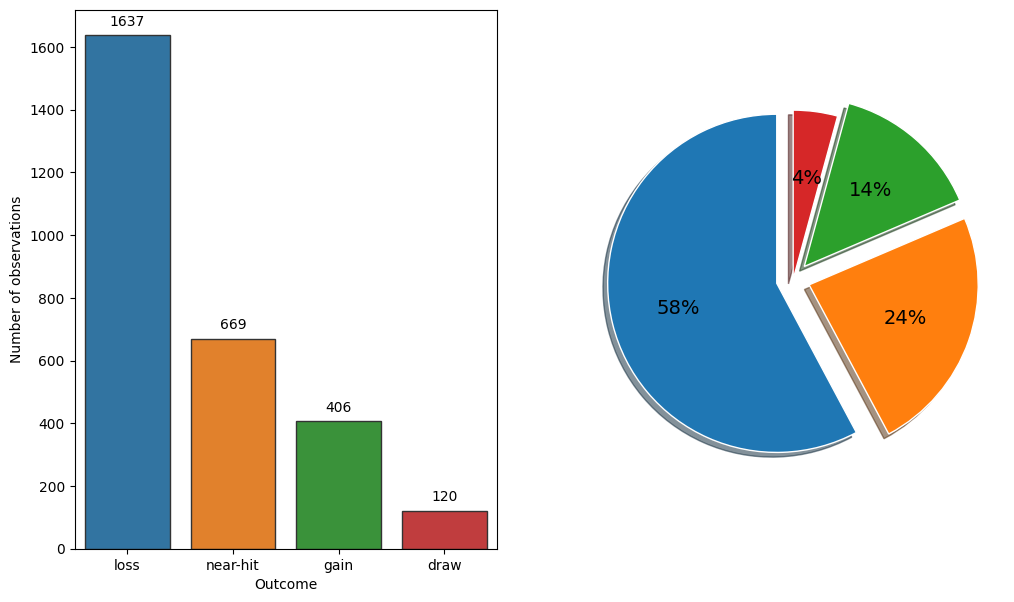

In [20]:

# Create figure 1  barplot of the number of losses, near-hits, gains, and draws
fig1, axes1 = plt.subplots(1, 2)
sns.countplot(x='result_type', data=dtf_stop_leg1_2, order=['loss', 'near-hit', 'gain', 'draw'], edgecolor=".2", ax=axes1[0])
axes1[0].set(xlabel='Outcome', ylabel='Number of observations')
# Display values on center top of each bar
for p in axes1[0].patches:
    axes1[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Create pie chart of the number of losses, gains, and draws, add it to axes1[1]
axes1[1].pie(dtf_stop_leg1_2['result_type'].value_counts(), labels=None, autopct='%.0f%%', startangle=90, textprops={'fontsize': 14}, explode=(0.1, 0.1, 0.1, 0), shadow=True, wedgeprops={'linewidth': 1, 'edgecolor': 'white', 'antialiased': True})


# Make figure 1 bigger
fig1.set_size_inches(12, 7)

## People who Continue Playing

In [14]:
# Calculate mean losses of dtf_continue_leg1_2
mean_loss = round(dtf_continue_leg1_2[dtf_continue_leg1_2['result_type'] == 'loss']['percent_return'].mean(), 2)
# Count how many losses of dtf_continue_leg1_2
count_loss = dtf_continue_leg1_2['result_type'].value_counts()['loss']
# Print mean loss and count of losses
print('Mean loss:', mean_loss)
print('Count of losses:', count_loss)
print('--------------------------------------------')

# Calculate mean near-hit of dtf_continue_leg1_2
mean_near_hit = round(dtf_continue_leg1_2[dtf_continue_leg1_2['result_type'] == 'near-hit']['percent_return'].mean(), 2)
# Count how many near-hits of dtf_continue_leg1_2
count_near_hit = dtf_continue_leg1_2['result_type'].value_counts()['near-hit']
# Print mean near-hit and count of near-hits
print('Mean near-hit:', mean_near_hit)
print('Count of near-hits:', count_near_hit)
print('--------------------------------------------')

# Calculate mean gain of dtf_continue_leg1_2
mean_gain = round(dtf_continue_leg1_2[dtf_continue_leg1_2['result_type'] == 'gain']['percent_return'].mean(), 2)
# Count how many gains of dtf_continue_leg1_2
count_gain = dtf_continue_leg1_2['result_type'].value_counts()['gain']
# Print mean gain and count of gains
print('Mean gain:', mean_gain)
print('Count of gains:', count_gain)
print('--------------------------------------------')

Mean loss: -100.0
Count of losses: 2159
--------------------------------------------
Mean near-hit: -64.96
Count of near-hits: 692
--------------------------------------------
Mean gain: 352.68
Count of gains: 517
--------------------------------------------


In [18]:
# calaculate stats of playercashableamt of dtf_continue_leg1_2
stats_cash = calc_sum_stats(dtf_continue_leg1_2['playercashableamt'])

# calaculate stats of wageredamt of dtf_continue_leg1_2
stats_wagered = calc_sum_stats(dtf_continue_leg1_2['wageredamt'])

# calaculate stats of age of dtf_continue_leg1_2
stats_age = calc_sum_stats(dtf_continue_leg1_2['age'])

# calaculate stats of maxbet of dtf_continue_leg1_2
stats_maxbet = calc_sum_stats(dtf_continue_leg1_2['maxbet'])

# calaculate stats of player_loss of dtf_continue_leg1_2
stats_player_loss = calc_sum_stats(dtf_continue_leg1_2['player_loss'])

# calaculate stats of player_wins of dtf_continue_leg1_2
stats_player_wins = calc_sum_stats(dtf_continue_leg1_2['player_wins'])

# calaculate stats of percent_return of dtf_continue_leg1_2
stats_percent_return = calc_sum_stats(dtf_continue_leg1_2['percent_return'])

# calaculate stats of slotdenomination of dtf_continue_leg1_2
stats_slotdenomination = calc_sum_stats(dtf_continue_leg1_2['slotdenomination'])

# Concant all stats into one df called stats_continue_play_leg1_2 with column names 'cash', 'wagered', 'age', 'maxbet', 'loss', 'wins', 'percent_return', 'slotdenomination'
stats_continue_play_leg1_2 = pd.concat([stats_cash, stats_wagered, stats_age, stats_maxbet, stats_player_loss, stats_player_wins, stats_percent_return, stats_slotdenomination], axis=1)
stats_continue_play_leg1_2.columns = ['cash', 'wagered', 'age', 'maxbet', 'loss', 'wins', 'percent_return', 'slotdenomination']
print(stats_continue_play_leg1_2.to_latex(index=True))

\begin{tabular}{lrrrrrrrr}
\toprule
{} &          cash &      wagered &          age &        maxbet &         loss &         wins &  percent\_return &  slotdenomination \\
\midrule
count    &   3680.000000 &  3680.000000 &  3680.000000 &   3680.000000 &  3680.000000 &  3680.000000 &     3680.000000 &       3680.000000 \\
mean     &     86.262332 &     3.072810 &    52.782609 &    260.337228 &    -0.801660 &     2.271149 &      -21.335179 &          1.007065 \\
std      &    202.073568 &     9.161003 &    14.012634 &    302.347589 &    21.435610 &    22.266147 &      289.276517 &          7.555322 \\
min      &      0.000000 &     0.020000 &     0.000000 &      1.000000 &  -100.000000 &     0.000000 &     -100.000000 &          0.010000 \\
max      &   1580.000000 &   100.000000 &    80.000000 &   1000.000000 &   900.000000 &  1000.000000 &     5615.000000 &        100.000000 \\
variance &  40833.726778 &    83.923974 &   196.353924 &  91414.064284 &   459.485380 &   495.781290 &    83

/var/folders/vp/1skwx2kd29s4fxnxx7tt9r6w0000gn/T/ipykernel_40284/4116719653.py:28: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(stats_continue_play_leg1_2.to_latex(index=True))


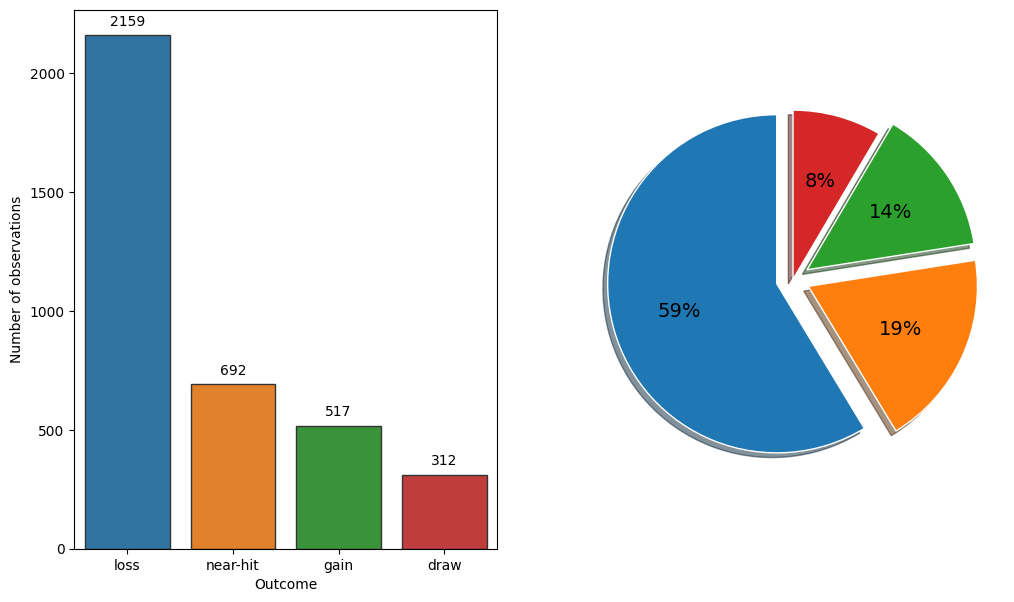

In [16]:
# Create figure 2 barplot of the number of losses, near-hits, gains, and draws
fig2, axes2 = plt.subplots(1, 2)
sns.countplot(x='result_type', data=dtf_continue_leg1_2, order=['loss', 'near-hit', 'gain', 'draw'], edgecolor=".2", ax=axes2[0])
axes2[0].set(xlabel='Outcome', ylabel='Number of observations')
# Display values on center top of each bar
for p in axes2[0].patches:
    axes2[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Create pie chart of the number of losses, gains, and draws, add it to axes2[1]
axes2[1].pie(dtf_continue_leg1_2['result_type'].value_counts(), labels=None, autopct='%.0f%%', startangle=90, textprops={'fontsize': 14}, explode=(0.1, 0.1, 0.1, 0), shadow=True, wedgeprops={'linewidth': 1, 'edgecolor': 'white', 'antialiased': True})

# Make figure 2 bigger
fig2.set_size_inches(12, 7)